## BE Comps
## Name    :   Pritam Rao
## UID     :   2018130044
## Roll No :   48


* **Exp 1A : Simple linear regression and Multiclass linear regression**
* **Exp 1B : To carry out logistic regression and calculate the performance metrics-Accuracy, Miss-classification rate, Receiver operating characteristics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EXP : Logistic Regression using Horse Colic Dataset to predict whether a horse lived, died or was euthanized

In [2]:
df = pd.read_csv('../input/dslabs2022/horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
## Looking at feature variables and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

## Feature Variable Info

- 1: surgery? 1 = Yes, it had surgery 2 = It was treated without surgery

- 2: Age 1 = Adult horse 2 = Young (< 6 months)

- 3: Hospital Number : numeric id the case number assigned to the horse (may not be unique if the horse is treated > 1 time)
- 4: rectal temperature :  in degrees celsius. 
- 5: pulse :  the heart rate in beats per minute
- 6: respiratory rate :  normal rate is 8 to 10
- 7: temperature of extremities : a subjective indication of peripheral circulation possible values: 1 = Normal 2 = Warm 3 = Cool 4 = Cold cool to cold extremities indicate possible shock hot extremities should correlate with an elevated rectal temp.
- 8: peripheral pulse : possible values are: 1 = normal 2 = increased 3 = reduced 4 = absent normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion
- 9: mucous membranes : a subjective measurement of colour possible values are: 1 = normal pink 2 = bright pink 3 = pale pink 4 = pale cyanotic 5 = bright red / injected 6 = dark cyanotic
- 10: capillary refill time a clinical judgement. The longer the refill, the poorer the circulation possible values 1 = < 3 seconds 2 = >= 3 seconds
- 11: pain : a subjective judgement of the horse's pain level
- 12: peristalsis : An indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases possible values: 1 = hypermotile 2 = normal 3 = hypomotile 4 = absent
- 13: abdominal distension : possible values 1 = none 2 = slight 3 = moderate 4 = severe an animal with abdominal distension is likely to be painful and have reduced gut motility, a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure
- 14: nasogastric tube : this refers to any gas coming out of the tube possible values: 1 = none 2 = slight 3 = significant a large gas cap in the stomach is likely to give the horse discomfort
- 15: nasogastric reflux : possible values 1 = none 2 = > 1 liter 3 = < 1 liter the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine
- 16: nasogastric reflux PH : scale is from 0 to 14 with 7 being neutral normal values are in the 3 to 4 range
- 17: rectal examination - feces possible values 1 = normal 2 = increased 3 = decreased 4 = absent absent feces probably indicates an obstruction
- 18: abdomen : possible values 1 = normal 2 = other 3 = firm feces in the large intestine 4 = distended small intestine 5 = distended large intestine
- 19: packed cell volume : the # of red cells by volume in the blood normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.
- 20: total protein : normal values lie in the 6-7.5 (gms/dL) range the higher the value the greater the dehydration
- 21: abdominocentesis appearance  : a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity possible values: 1 = clear 2 = cloudy 3 = serosanguinous
- 22: abdomcentesis total protein : the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL
- 23: outcome : 1 = lived 2 = died 3 = was euthanized
- 24: surgical lesion : retrospectively, was the problem (lesion) surgical? all cases are either operated upon or autopsied so that this value and the lesion type are always known possible values: 1 = Yes 2 = No
- 25, 26, 27: type of lesion
- 28: cp_data : is pathology data present for this case? 1 = Yes 2 = No this variable is of no significance since pathology data is not included or collected for these cases

In [4]:
# dimensions of dataframe
df.shape  # 299 rows instances of datapoints for 28 features 

(299, 28)

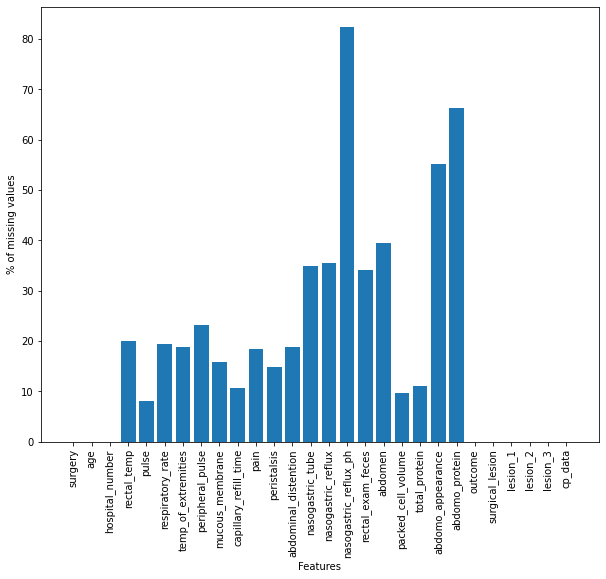

In [5]:
## Percentage of data with empty values

missing = df.isna().sum()/len(df)*100
plt.figure(figsize=(10,8))
plt.bar(range(len(missing)),missing)
plt.xlabel('Features')
plt.ylabel('% of missing values')
plt.xticks(list(range(len(df.columns))),list(df.columns.values),rotation='vertical')
plt.show()

## There are lot of missing values

In [6]:
## Splitting features into categorical and numeric
non_numeric = []
numeric = []
for col in df.columns.values:
    if df[col].dtype=='object':
        non_numeric.append(col)
    else:
        numeric.append(col)
        
df_numeric = df[numeric]
df_non_numeric = df[non_numeric]

## Handling missing values
- For columns with more than 50% missing values => Remove Columns
- For columns with less than 50% missing values
- For Numerical Data: Replace missing values with median value of that particular column
- For Categorical Data: Replace missing values with mode value of that particular column

In [7]:
for col in df_numeric.columns.values: # Iterate through all numeric columns
    if (pd.isna(df_numeric[col]).sum())>0: # If column has null values
        if pd.isna(df_numeric[col]).sum()>(0.5*len(df_numeric)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_numeric = df_numeric.drop([col], axis=1)
        else:
            df_numeric[col] = df_numeric[col].fillna(df_numeric[col].median()) # Else, fill the null values with the median of the non-null values

nasogastric_reflux_ph has been removed
abdomo_protein has been removed


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
df_numeric.isna().sum()

hospital_number       0
rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
lesion_1              0
lesion_2              0
lesion_3              0
dtype: int64

In [9]:
for col in df_non_numeric.columns.values: # Iterate through all categorical columns
    if (pd.isna(df_non_numeric[col]).sum())>0: # If column has null values
        if pd.isna(df_non_numeric[col]).sum()>(0.5*len(df_non_numeric)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_non_numeric = df_non_numeric.drop([col], axis=1)
        else:
            df_non_numeric[col] = df_non_numeric[col].fillna(df_non_numeric[col].mode()[0])

abdomo_appearance has been removed


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
df_non_numeric.isna().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64

## EDA

## Univariate Analysis

In [11]:
df_eda = pd.concat([df_numeric,df_non_numeric],axis=1) # Merging the two dataframes only for EDA


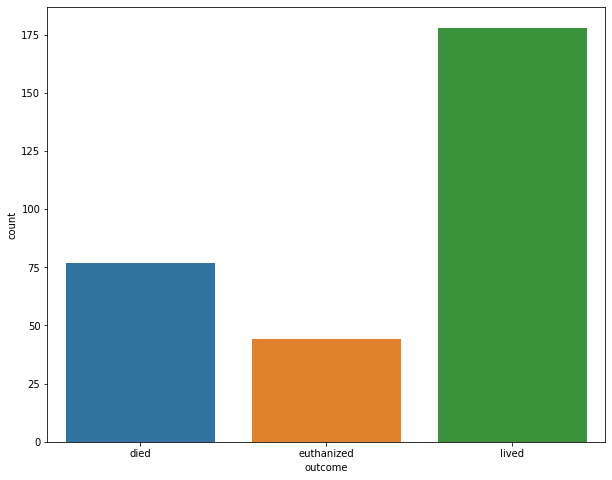

In [12]:
## Looking at the distribution of dependent variable i.e outcome
plt.figure(figsize=(10,8))
sns.countplot(data=df_eda, x="outcome");


In [13]:
## Converting categorical variable to numerical 
for col in df_non_numeric.columns.values:
    df_non_numeric[col] = df_non_numeric[col].astype('category').cat.codes # Encoding categorical columns
    
merged_df = pd.concat([df_numeric,df_non_numeric],axis=1) # Merging the two dataframes


## Bivariate Analysis

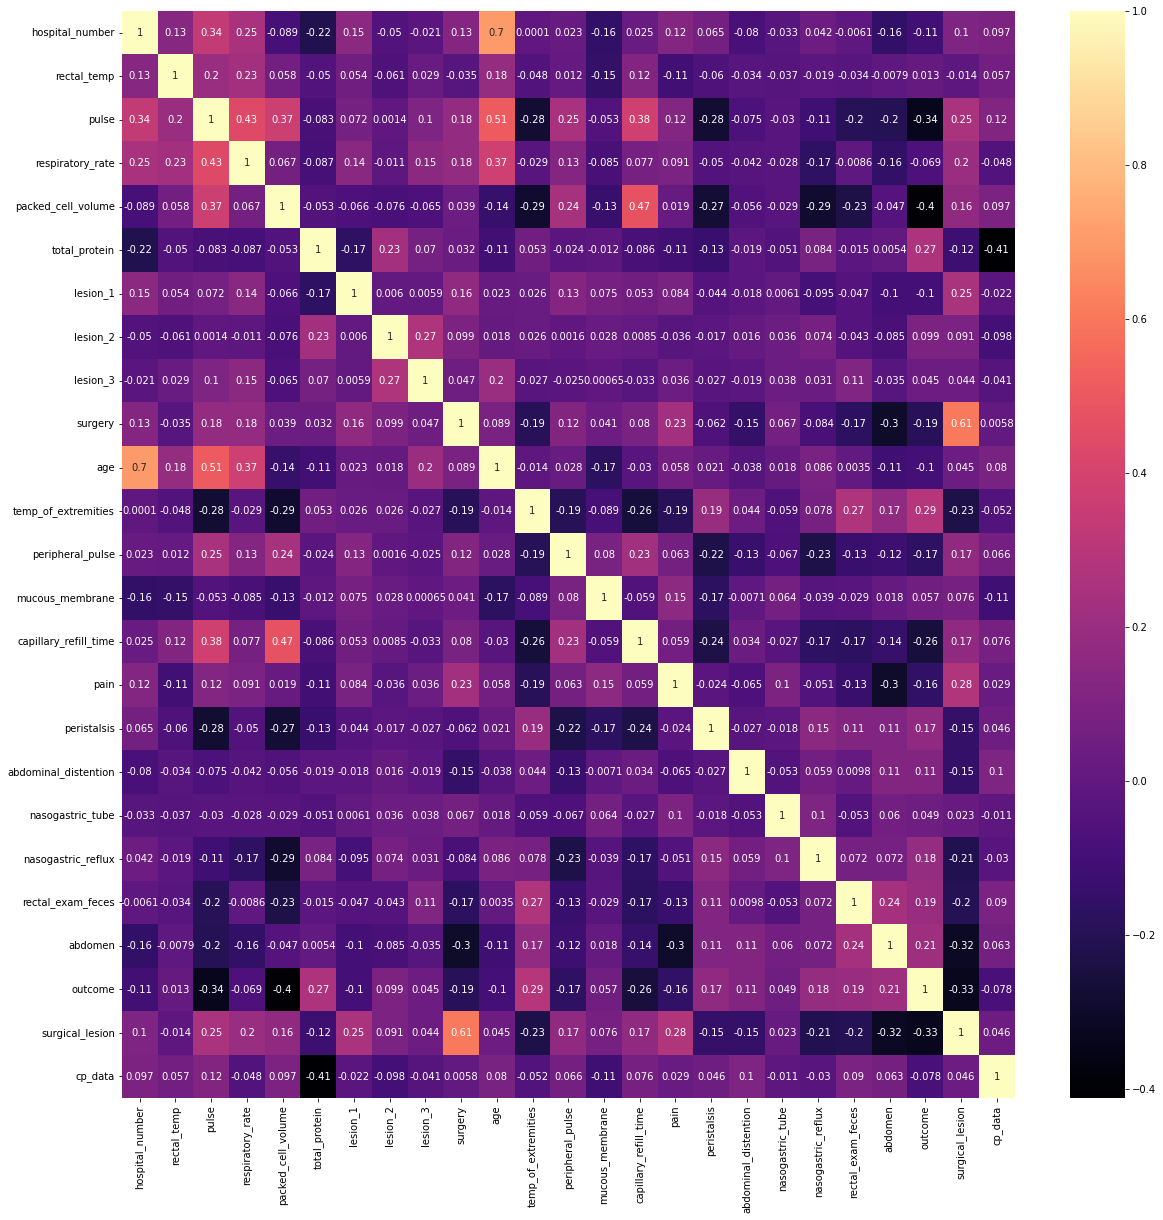

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(merged_df.corr(),cmap='magma',annot=True);


In [15]:
merged_df.corr()['outcome'].sort_values(ascending=False)

outcome                  1.000000
temp_of_extremities      0.290367
total_protein            0.265889
abdomen                  0.214875
rectal_exam_feces        0.193004
nasogastric_reflux       0.181422
peristalsis              0.165844
abdominal_distention     0.112309
lesion_2                 0.098993
mucous_membrane          0.056852
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.013273
respiratory_rate        -0.068581
cp_data                 -0.078066
lesion_1                -0.100738
age                     -0.101782
hospital_number         -0.106396
pain                    -0.161964
peripheral_pulse        -0.165719
surgery                 -0.189222
capillary_refill_time   -0.256294
surgical_lesion         -0.332933
pulse                   -0.335550
packed_cell_volume      -0.398371
Name: outcome, dtype: float64

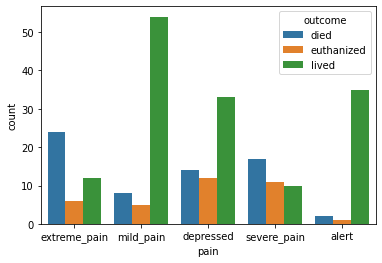

In [16]:
sns.countplot(data=df, x='pain', hue = 'outcome');
## larger the pain lesser chances of survival

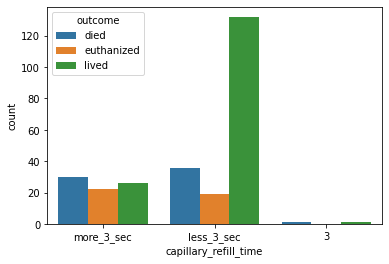

In [17]:
sns.countplot(data=df, x='capillary_refill_time', hue = 'outcome');
## Bad circulation causes pain and consequentally death 


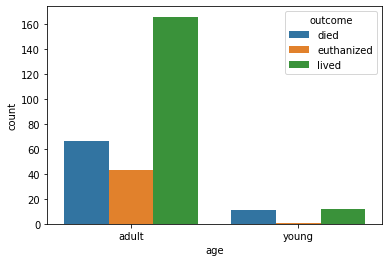

In [18]:
sns.countplot(data=df, x='age', hue = 'outcome');
# Younger horses have weaker immune hence their chance of survival is less


## Splitting data into train and test model

In [19]:
## Splitting Data into Train and Test and Model Selection/Training
from sklearn.model_selection import train_test_split
X = merged_df.drop('outcome',axis=1)
y = merged_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15) # 20% Test split

In [20]:
## Logistic Regression Model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [21]:
# Model Evaluation
print('Classification Report\n',classification_report(y_test, predictions))
print('Confusion Matrix\n',confusion_matrix(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision Score:",metrics.precision_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score:",metrics.recall_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        10
           2       0.49      1.00      0.66        22

    accuracy                           0.49        45
   macro avg       0.16      0.33      0.22        45
weighted avg       0.24      0.49      0.32        45

Confusion Matrix
 [[ 0  0 13]
 [ 0  0 10]
 [ 0  0 22]]
Accuracy: 0.4888888888888889
Precision Score: 0.4888888888888889
Recall Score: 0.4888888888888889


### Exp : Logistic Regression using Credit Score Dataset to predict Risk

In [22]:
df = pd.read_csv("../input/dslabs2022/credit_data.csv")
df = df.iloc[:,1:]
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [24]:
df.describe() # numerical statstic

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [25]:
df.shape

(1000, 10)

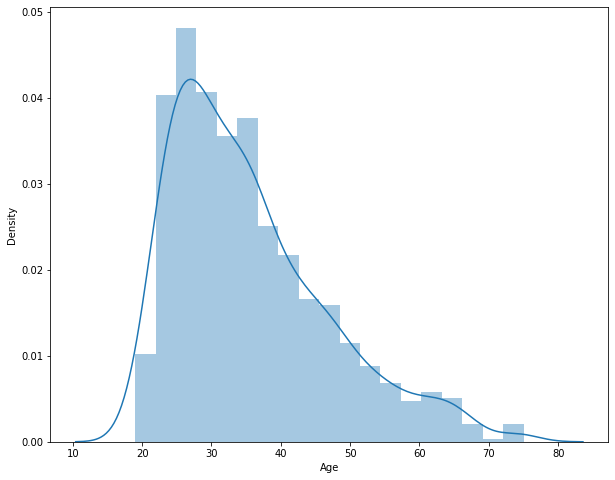

In [26]:
## EDA
plt.figure(figsize=(10,8))
sns.distplot(df["Age"]);

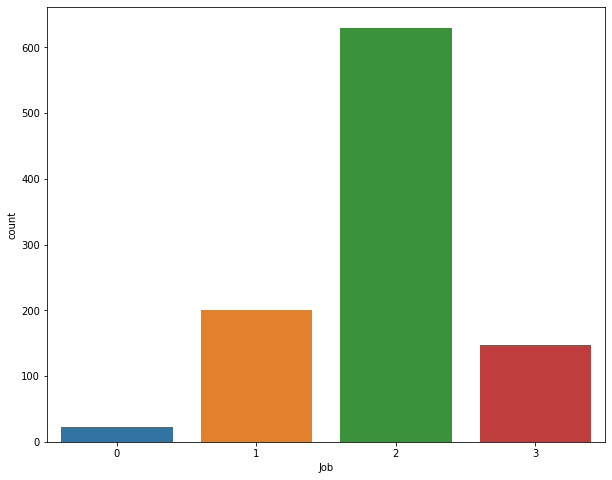

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(df['Job']);

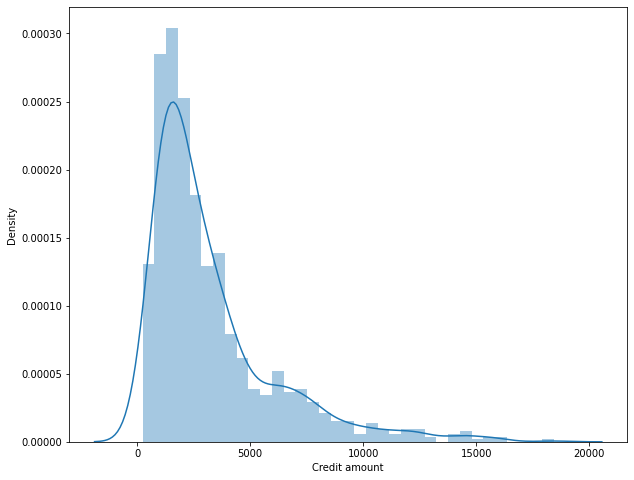

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(df['Credit amount']);

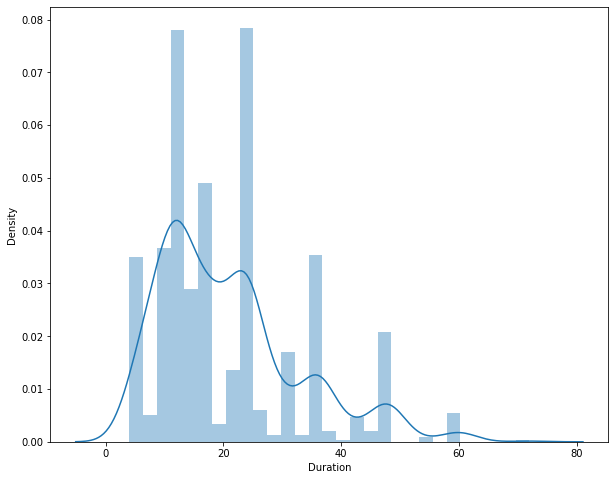

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['Duration']);


In [30]:
missing = df.isna().sum()/len(df)*100
missing

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

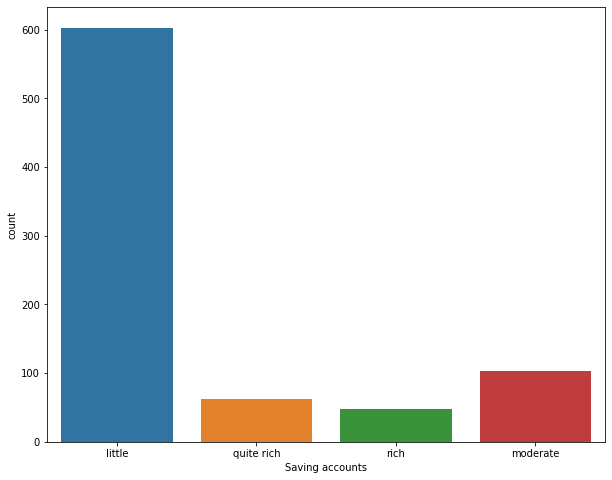

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(df['Saving accounts']);

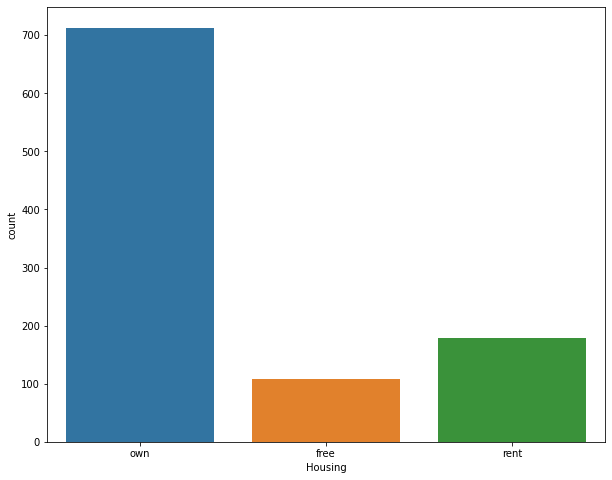

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(df['Housing']);

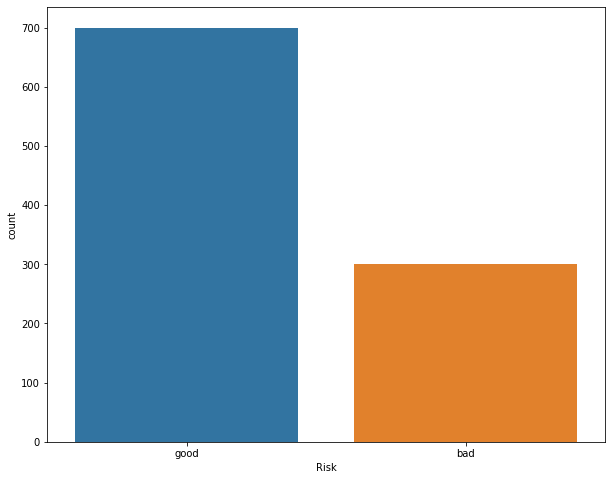

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(df['Risk']);

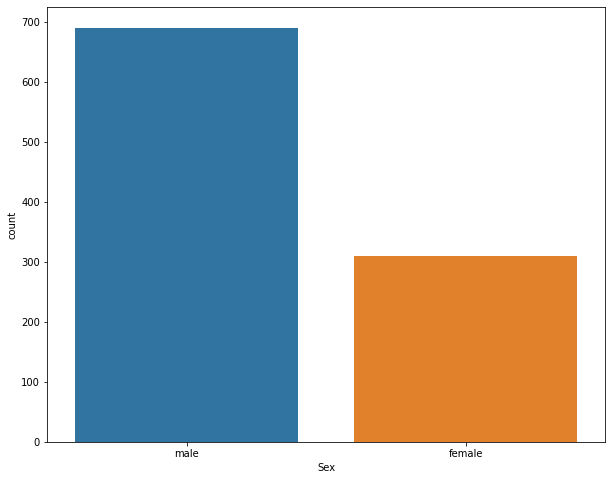

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(df['Sex']);

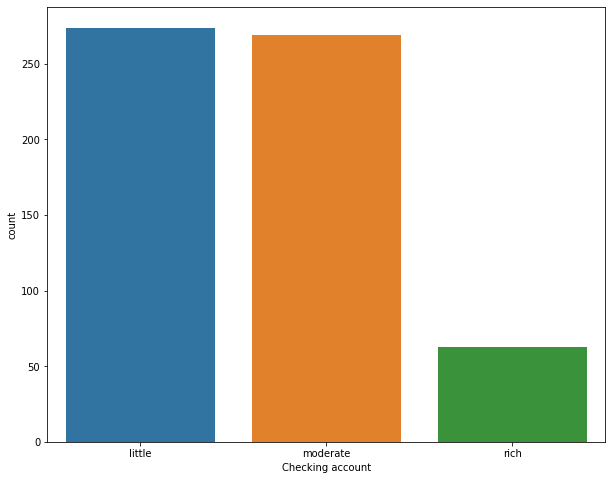

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(df['Checking account']);

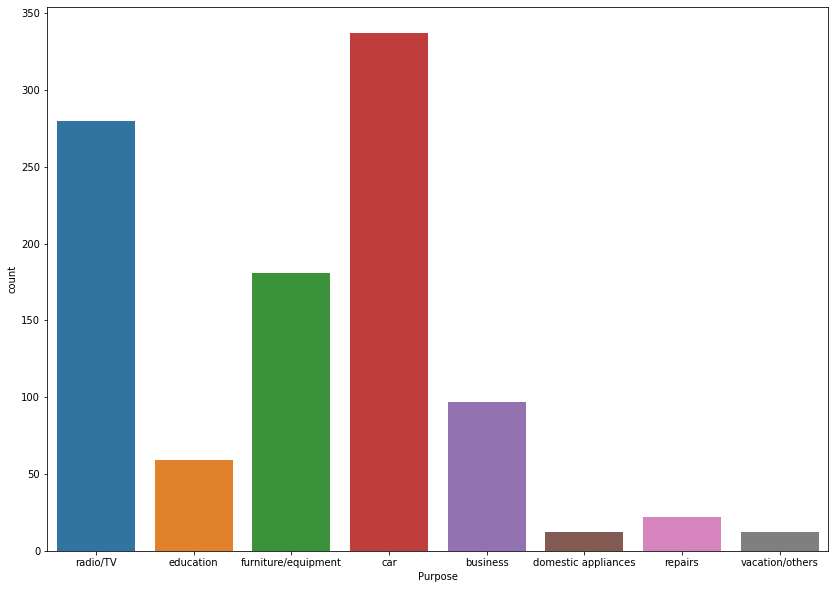

In [36]:
plt.figure(figsize=(14,10))
sns.countplot(df['Purpose']);

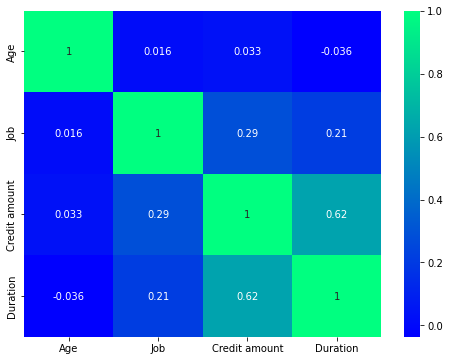

In [37]:
plt.figure(figsize=(8,6))
corr = sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,annot=True,cmap='winter');


## Handling missing values

In [38]:
m = df['Saving accounts'].mode()
df['Saving accounts'].fillna(m[0],inplace=True)
m = df['Checking account'].mode()
df['Checking account'].fillna(m[0],inplace=True)

In [39]:
missing = df.isna().sum()/len(df)*100
missing

Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64

In [40]:
## Splitting features into categorical and numeric
non_numeric = []
numeric = []
for col in df.columns.values:
    if df[col].dtype=='object':
        non_numeric.append(col)
    else:
        numeric.append(col)
        
df_numeric = df[numeric]
df_non_numeric = df[non_numeric]

In [41]:
temp = df.copy()

In [42]:
numeric

['Age', 'Job', 'Credit amount', 'Duration']

In [43]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Sex"]=label.fit_transform(df["Sex"])
df["Risk"]=label.fit_transform(df["Risk"])
df["Housing"]=label.fit_transform(df["Housing"])
df["Saving accounts"]=label.fit_transform(df["Saving accounts"])
df["Checking account"]=label.fit_transform(df["Checking account"])
df["Purpose"]=label.fit_transform(df["Purpose"])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["Age"]=scaler.fit_transform(df[["Age"]])
df["Duration"]=scaler.fit_transform(df[["Duration"]])
df["Credit amount"]=scaler.fit_transform(df[["Credit amount"]])

In [45]:
df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
221,-1.103451,0,2,2,0,0,-0.734144,-0.738668,3,1
854,0.831502,1,2,1,0,0,2.695096,1.252574,1,1
990,0.127883,1,1,1,0,0,0.104115,-0.738668,3,1
184,0.039930,1,2,1,0,1,-0.846148,-0.240857,1,0
768,-0.663689,1,2,2,0,1,0.122546,-0.738668,4,1
411,-0.048022,1,3,1,0,0,1.411302,1.003669,1,1
965,-0.839594,0,2,1,0,1,-0.551605,0.754763,5,1
337,-1.015499,0,2,2,0,0,-0.707560,-0.489762,2,0
740,-0.311879,1,2,1,1,0,-0.335395,0.256953,1,1
163,3.030314,1,3,0,0,1,1.430796,-0.904604,1,1


In [46]:
from sklearn.model_selection import train_test_split
X = df.drop(["Risk"],axis=1)
y = df["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Test split

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [48]:
## Model Evaluation
# Model Evaluation
print('Classification Report\n',classification_report(y_test, predictions))
print('Confusion Matrix\n',confusion_matrix(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision Score:",metrics.precision_score(y_test, predictions))
print("Recall Score:",metrics.recall_score(y_test, predictions))

Classification Report
               precision    recall  f1-score   support

           0       0.60      0.15      0.24        60
           1       0.72      0.96      0.82       140

    accuracy                           0.71       200
   macro avg       0.66      0.55      0.53       200
weighted avg       0.69      0.71      0.65       200

Confusion Matrix
 [[  9  51]
 [  6 134]]
Accuracy: 0.715
Precision Score: 0.7243243243243244
Recall Score: 0.9571428571428572


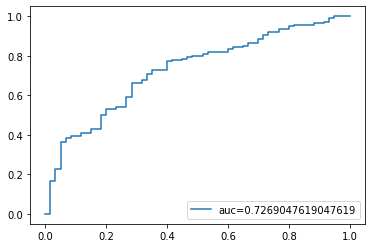

In [49]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Exp : Linear Regression using AutoMPG Dataset

In [50]:
df = pd.read_csv('../input/dslabs2022/auto_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [52]:
df.shape

(398, 9)

In [53]:
# converting the horse power to numeric
missing_value = pd.DataFrame(df.horsepower.str.isdigit())  
df[missing_value['horsepower'] == False] 
# Encoding '?' values as null values
df[df == '?'] = np.nan
df[missing_value['horsepower'] == False] 
df['horsepower'] = df['horsepower'].astype('float64') 


In [54]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [55]:
df.isna().sum()/len(df)*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

In [56]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [57]:
df.isna().sum()/len(df)*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64

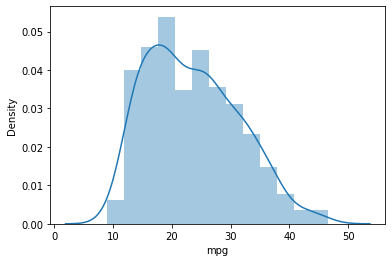

In [58]:
sns.distplot(df['mpg']);

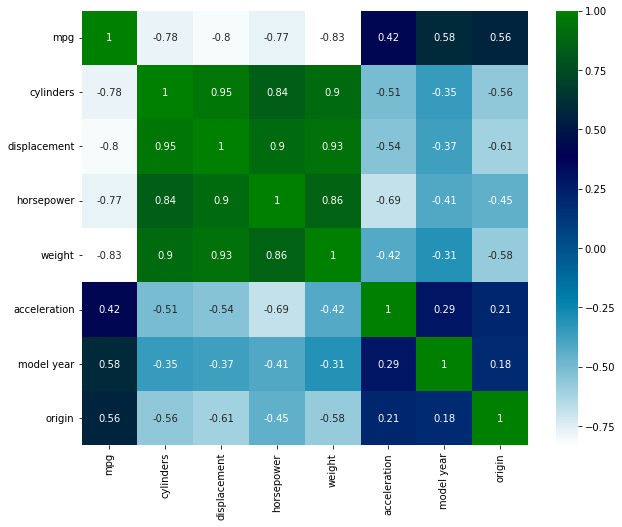

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'ocean_r');

In [60]:
X = df.drop(['mpg','car name'], axis=1)
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
model.coef_

array([[-0.4914948 ,  0.02231945, -0.02461053, -0.00639836,  0.06998631,
         0.73400898,  1.53609425]])

In [63]:
model.score(X_test,y_test)

0.7879398840233823

In [64]:
predictions = model.predict(X_test)
rmse = metrics.mean_squared_error(y_test, predictions) ** (0.5)
print(f'Root Mean Square Error = {rmse}')


Root Mean Square Error = 3.7125703024303185
